## Presidential Speech Analysis

## Brandon Onyejekwe

## Created 8/19/2021

In [1]:
import re
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from pathlib import Path
import wordcloud as wc
from collections import Counter
import numpy as np
import pandas as pd
import seaborn as sns

In [9]:
def read_speech(filename):
    """Read speeches from filename into a dict with keys as presidents and values as their speeches"""
    with open(filename) as infile:
        speech_dict = {}
        speech_str = ''
        speeches = infile.readlines()
        speeches = [ s.strip() for s in speeches if s.strip() != ''] #get rid of newline/whitespace
        presidents = [s.split('{')[1].split('}')[0] for s in speeches if '{' in s] #president names
        speeches = [s if '{' not in s else '{' for s in speeches]
        for s in speeches:
            speech_str += s

        speeches = speech_str.split('{')[1:]

        for i in range(len(presidents)):
            speech_dict[presidents[i]] = speeches[i]
    return speech_dict

#reading speeches
def get_speech(president, speechtype):
    """Get a presidents speech from a file of speeches and return as a string"""
    return read_speech(speechtype)[president]

#get_speech('Biden', 'inaugural_addresses.txt')

#read_speech('farewell_addresses.txt')
#read_speech('inaugural_addresses.txt')
#list(read_speech('inaugural_addresses.txt').keys())
#list(read_speech('inaugural_addresses.txt').items())
#read_speech('inaugural_addresses.txt')['Obama I']

['Biden',
 'Trump',
 'Obama II',
 'Obama I',
 'W Bush II',
 'W Bush I',
 'Clinton II',
 'Clinton I',
 'H W Bush',
 'Reagan II',
 'Reagan I',
 'Carter',
 'Nixon II',
 'Nixon I',
 'Johnson',
 'Kennedy',
 'Eisenhower II',
 'Eisenhower I',
 'Truman']

## Part 2: Word Clouds

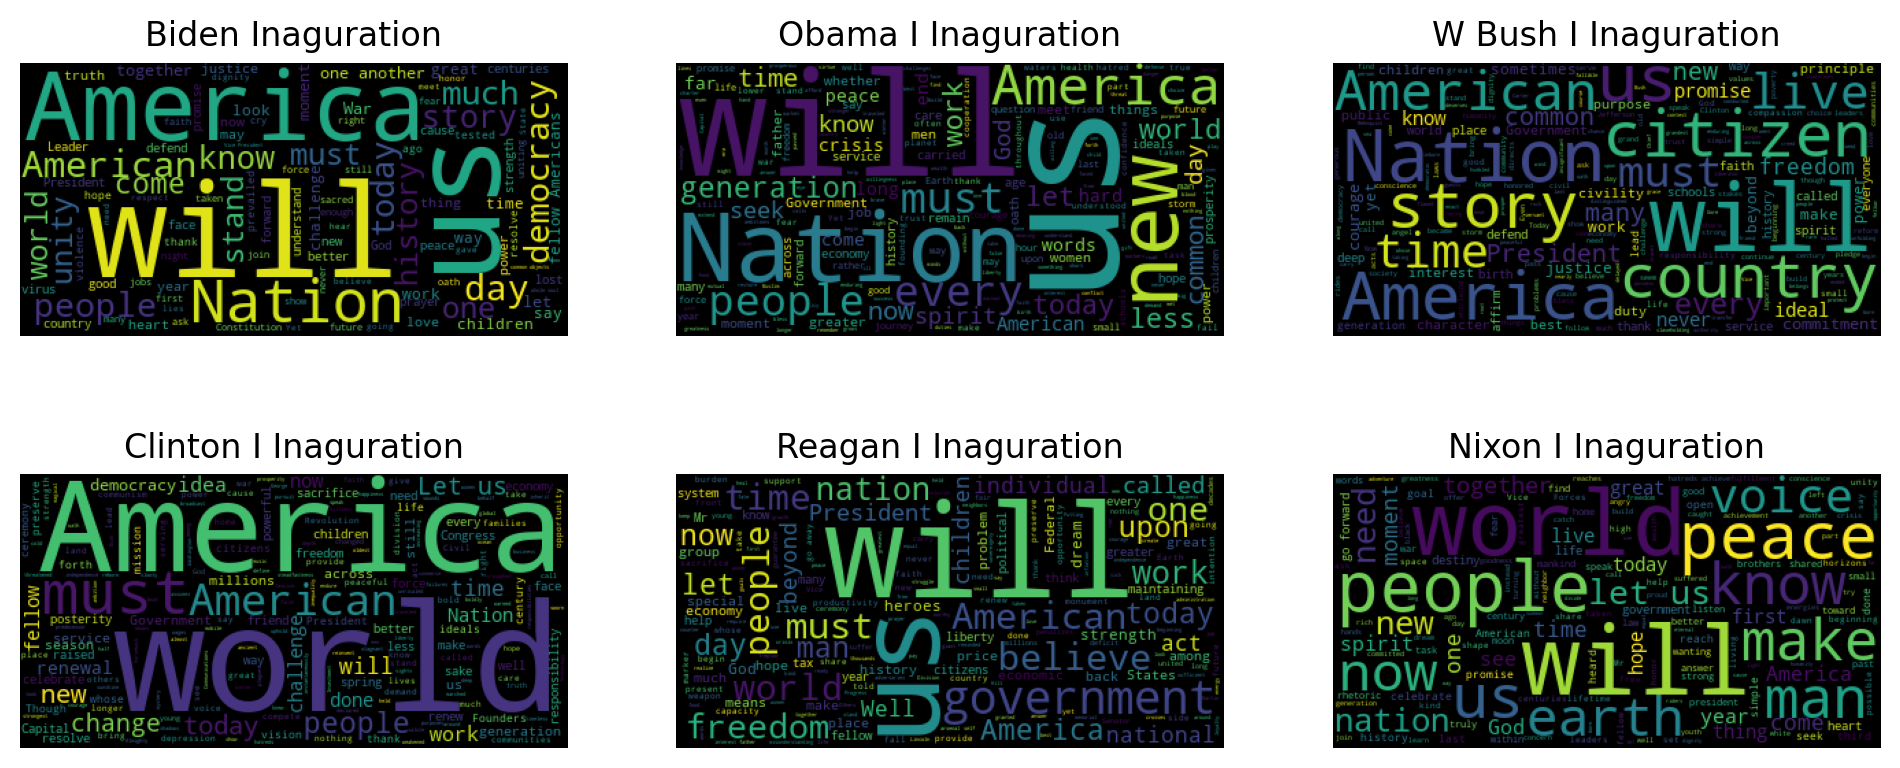

In [5]:
six_list = ['Biden', 'Obama I', 'W Bush I', 'Clinton I', 'Reagan I', 'Nixon I']

def word_cloud(president, speechtype):
    """Generate a word cloud for a given speech"""
    c = get_speech(president, speechtype)
    s_cloud = wc.WordCloud().generate(c)
    return s_cloud

def wc_plot(speech_list, speechtype, rows=2, columns=4):
    """Plot the word clouds for specified presidents in 'name_list' arranged in a 'i' x 'j' plot
    (to show one word cloud, set rows = columns = 1)"""
    fig = plt.figure(figsize=(12, 5), dpi=200)
    for k in range(len(speech_list)):
        fig.add_subplot(rows, columns, k+1)
        plt.imshow(word_cloud(speech_list[k], speechtype))
        plt.title(speech_list[k] + ' Inaguration')
        plt.axis('off')
    plt.show()

wc_plot(six_list, 'inaugural_addresses.txt', columns=3)

Word clouds for the following six presidents: Biden (D, 2021), Obama (D, 2009), Bush Jr (R, 2001), Clinton (D, 1993), Reagan (R, 1981), and Nixon (R, 1969).

## Part 3: Sentiment Analysis

In [7]:
def speech_in_sentences(speech_str):
    """Take speech ans split it into list of sentences (w/o paragraphs)"""
    sentences = re.split('[\.\?\!]', speech_str) #list
    speech = [ s.strip() for s in sentences]
    speech = [ s.strip() + '.' for s in speech if s != '']
    return speech
#b1 = speech_in_sentences(b)

# scoring speeches
def score_sentence(sentence):
    """Score each sentence for sentiment (pol/sub)""" 
    pol, sub = TextBlob(sentence).sentiment
    return (pol, sub)

#[score_sentence(b1[i]) for i in range(len(b1))]

def avg_score(president, speechtype):
    """Return average sentece score (pol, sub) for a speech""" 
    speech = speech_in_sentences(get_speech(president, speechtype))
    p, s = [], []
    for sentence in speech:
        pol, sub = score_sentence(sentence)
        p.append(pol)
        s.append(sub)
    avg_p = sum(p) / len(p)
    avg_s = sum(s) / len(s)
    return avg_p, avg_s
#avg_score('Biden', 'inaugural_addresses.txt')

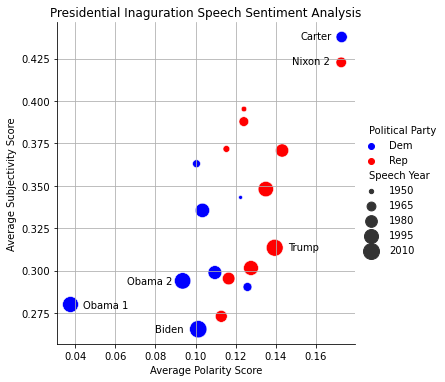

In [10]:
presidents = list(read_speech('inaugural_addresses.txt').keys())

party = ['Dem', 'Rep', 'Dem', 'Dem', 'Rep',     'Rep', 'Dem', 'Dem', 'Rep', 'Rep',
         'Rep', 'Dem', 'Rep', 'Rep', 'Dem',     'Dem', 'Rep', 'Rep', 'Dem' ]

times = [ 2021,  2017,  2013,  2009,  2005,     2001,  1997,  1993,  1989,  1985, 
          1981,  1977,  1973,  1969,  1965,     1961,  1957,  1953,  1949]

df = pd.DataFrame({'pres_name':presidents, 'Political Party':party, 'Speech Year':times})
df['Average Polarity Score'] = df.apply(lambda row : avg_score(row.pres_name, 'inaugural_addresses.txt')[0], axis=1)
df['Average Subjectivity Score'] = df.apply(lambda row : avg_score(row.pres_name, 'inaugural_addresses.txt')[1], axis=1)

sns.relplot(data=df, x='Average Polarity Score', y='Average Subjectivity Score', hue='Political Party', 
            size='Speech Year', sizes=(15, 300), palette=['b', 'r'])

plt.title('Presidential Inaguration Speech Sentiment Analysis')
plt.text(.08, .2635, 'Biden')
plt.text(.146, .312, 'Trump')
plt.text(.066, .292, 'Obama 2')
plt.text(.044, .278, 'Obama 1')

plt.text(.1521, .4362, 'Carter')
plt.text(.148, .422, 'Nixon 2')

plt.grid()

The four most recent imagural speeches (Obama 2009 and 2013, Trump 2017, and Biden 2021) are labeled. Those of Nixon (1973) and Carter (1977) are also labelled because of their abnormally high subjectivity and polarity scores, possibly relating to some events occuring in the United States during the 1970s.

Sentiment may have some relationship with political party affiliation. Democrats tend to have lower average polarity and subjectivity scores. At least for the Democrats, the polarity and subjectivity scores seem to be treding closer to zero in recent years.

In [11]:
presidents = list(read_speech('inaugural_addresses.txt').keys())
d = { p[0]: (p[1], p[2]) for p in list(zip(presidents, party, times))}
d #list(zip(presidents, party, times))

{'Biden': ('Dem', 2021),
 'Trump': ('Rep', 2017),
 'Obama II': ('Dem', 2013),
 'Obama I': ('Dem', 2009),
 'W Bush II': ('Rep', 2005),
 'W Bush I': ('Rep', 2001),
 'Clinton II': ('Dem', 1997),
 'Clinton I': ('Dem', 1993),
 'H W Bush': ('Rep', 1989),
 'Reagan II': ('Rep', 1985),
 'Reagan I': ('Rep', 1981),
 'Carter': ('Dem', 1977),
 'Nixon II': ('Rep', 1973),
 'Nixon I': ('Rep', 1969),
 'Johnson': ('Dem', 1965),
 'Kennedy': ('Dem', 1961),
 'Eisenhower II': ('Rep', 1957),
 'Eisenhower I': ('Rep', 1953),
 'Truman': ('Dem', 1949)}

## Part 4: Common Words

In [12]:
def speech_words(president, speechtype):
    """ list of words in speech as lowercase and w/o punctuation"""
    clean_words = []
    sentences = speech_in_sentences(get_speech(president, speechtype))
    for sentence in sentences:    
        for word in sentence.split():
            word = re.sub("[^\w\s]", "", word)
            word = word.lower()
            clean_words.append(word)
    return clean_words

def common_words(word_list, length = 5, num=100):
    word_list = [ word for word in word_list if len(word) >= length ]
    common = Counter(word_list).most_common(num)
    words = [n[0] for n in common]
    values = [n[1] for n in common]
    return words, values
#common_words(speech_words('Biden','inaugural_addresses.txt'))

In [13]:
# cosine similarity
def vec(words, all_words):
    d = { w:v for w, v  in words}
    return [ d[word] if word in d.keys() else 0 for word in all_words]

def mag(v):
    """Magnitude of vector v"""
    return sum([i ** 2 for i in v ]) ** 0.5

def dot(u, v):
    """Dot product of two vectors"""
    return sum([ ui*vi for ui, vi in zip(u,v)])
    
def cos_sim(u,v):
    """Cosine similarity b/w u and v"""
    cos_theta = dot(u,v) / (mag(u) * mag(v))
    return cos_theta

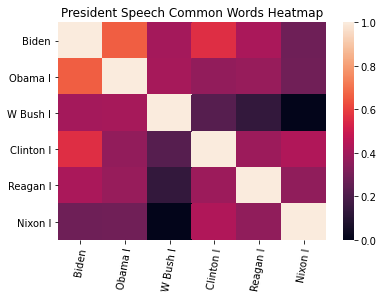

In [14]:
def plot_sim(presidents, n=100, l=5):
    """Create a heatmap from a list of presidents (ie. p = 'obama_i1.txt')"""
    p_words = [ common_words(speech_words(p, 'inaugural_addresses.txt'), length=l, num=n)  for p in  presidents] #common words of each president                                                                                     
    p_data = [ list(zip(elem[0], elem[1])) for elem in p_words ]

    unique = set()
    for pres in p_data:
        for w, v in pres:
            unique.add(w)
            
    num_users =len(p_words)
    simarray = np.zeros((num_users, num_users), dtype=float)
    
    for i in range(num_users):
        veci = vec(p_data[i], unique)
        for j in range(num_users):
            vecj = vec(p_data[j], unique)
            simarray[i,j] = cos_sim(veci, vecj)
            
    heat_map = sns.heatmap(simarray, xticklabels=presidents, yticklabels=presidents)
    plt.title('President Speech Common Words Heatmap')
    plt.xticks(rotation=80)
    plt.show()

    
p_six_list = ['Biden', 'Obama I', 'W Bush I', 'Clinton I', 'Reagan I', 'Nixon I']
plot_sim(p_six_list, n=10)


Heatmap for the following six presidents: Biden (D, 2021), Obama (D, 2009), Bush Jr (R, 2001), Clinton (D, 1993), Reagan (R, 1981), and Nixon (R, 1969). 

Biden's speech tended to have the most similarities to Obama's and Clinton's respective first-term speeches, which makes sense considering they are the three democrats in this analysis.

## Part 5: Other Speech Analysis

In [15]:
def moving_averages(data, window_size=10):
    """Compute the moving average using the specified window size"""
    moving_average = {}
    # for each data point, accumulate all the relevant values
    for sent_idx in data:
        moving_average[sent_idx] = []
        for window_idx, day in data.items():
            if abs(sent_idx - window_idx) <= window_size / 2:
                moving_average[sent_idx].append(day)
    #convert each aggregate (window values) to an average
    for sent in moving_average:
        moving_average[sent] = sum(moving_average[sent]) / len(moving_average[sent])     
    return moving_average

def speech_pol(president, speechtype, window_size=10):
    """Plots the speech polarity sentence by sentence"""
    s1 = speech_in_sentences(get_speech(president, speechtype))
    pol = [ score_sentence(s)[0] for s in s1 ]
    l = [ i+1 for i in range(len(pol))]
    return (l, pol)
#speech_pol('Biden', 'inaugural_addresses.txt')

def speech_sub(president, speechtype, window_size=10):
    """Plots the speech subjectivity sentence by sentence"""
    s1 = speech_in_sentences(get_speech(president, speechtype))
    sub = [ score_sentence(s)[1] for s in s1 ]
    l = [ i+1 for i in range(len(sub))]
    return (l, sub)

In [20]:
def pres_df(speechtype, m=len(presidents), w=10):
    """Creates a df for plotting the sentiment scores over time"""
    sent_idx, s_pol, s_sub = [], [], []
    p_aff, t_period, pres_name = [], [], []
    
    for i in range(m):
        num_pol, sent_pol = speech_pol(presidents[i], speechtype, w)
        pol2 = { l:s for l, s in zip(num_pol, sent_pol) }
        num_pol = list(moving_averages(pol2, w).keys())
        sent_pol = list(moving_averages(pol2, w).values())       
        
        num_sub, sent_sub = speech_sub(presidents[i], speechtype, w)
        sub2 = { l:s for l, s in zip(num_sub, sent_sub) }
        num_sub = list(moving_averages(sub2, w).keys())
        sent_sub = list(moving_averages(sub2, w).values())  
             
        #print(len(num_pol), len(sent_pol), len(num_sub), len(sent_sub))
        name, party_aff, time = presidents[i], party[i], times[i]        
        #print(name, party_aff, time)

        for i in range(len(num_pol)):
            sent_idx.append(num_pol[i])
            s_pol.append(sent_pol[i])
            s_sub.append(sent_sub[i])
            p_aff.append(party_aff)
            t_period.append(time)
            pres_name.append(name)

    df = pd.DataFrame({'pres_name':pres_name, 'Political Party':p_aff, 'Inaug. Date':t_period,
                      'Sentence Number':sent_idx, 'Polarity Score':s_pol, 'Subjectivity Score':s_sub })
    return df

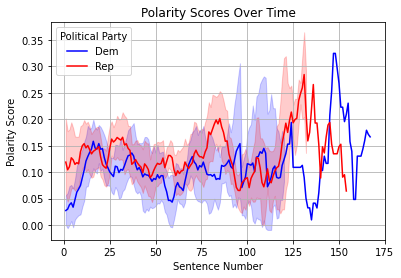

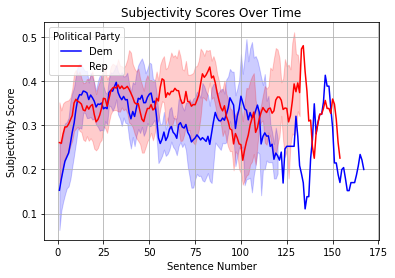

In [21]:
a = pres_df('inaugural_addresses.txt')

sns.lineplot(data=a, x='Sentence Number', y='Polarity Score', hue='Political Party', palette=['b', 'r'])
plt.title('Polarity Scores Over Time')
plt.grid()
plt.show()

sns.lineplot(data=a, x='Sentence Number', y='Subjectivity Score', hue='Political Party', palette=['b', 'r'])
plt.title('Subjectivity Scores Over Time')
plt.grid()
plt.show()

Moving average sentiment score for each sentence in the speech, averaged over time for the two political parties. 

They appear to move very similarly except in the middle of the speeches(between the 50th and 100th sentence) and at the end, where it seems Republicans tend to use more polarizing and subjective sentences.